# Slingshot - Atlas

# Setup

In [107]:
source("/home/ridvan/scRIPT/settings.R")
source("/home/ridvan/scRIPT/utils.R")

In [115]:
source("./slingshot_utils.R")

In [6]:
BPPARAM <- BiocParallel::bpparam()
BPPARAM$workers = 25

# Multi core using future - built in to seurat
plan("multicore", workers = 25)
options(future.globals.maxSize = 250 * 1024 ^ 3) # for 250 Gb RAM

getwd()

[1] "/home/ridvan/PhD_Projects/CMO/Bioinformatic_Analysis/step11_slingshot"

In [7]:
suppressPackageStartupMessages({
  library(Seurat)
  library(plotly)
  options(rgl.printRglwidget = TRUE)
  library(Matrix)
  library(sparseMatrixStats)
  library(slingshot)
  library(tradeSeq)
  library(patchwork)
})


In [8]:
atlas <- readRDS('../../../../scRIPT/000_io_dir/outputs/rds_files//extended_atlas_cellranger_features_seurat.rds')
atlas

An object of class Seurat 
27669 features across 430339 samples within 1 assay 
Active assay: originalexp (27669 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: UMAP, PCA

In [11]:
atlas$cell_type_subclusters <- atlas$celltype_extended_atlas

In [12]:
complete_atlas <- atlas

# Primitive wave

In [14]:
keep <- c('Epiblast','Primitive Streak','Nascent mesoderm','Haematoendothelial progenitors',  'Blood progenitors', 'Erythroid')

In [15]:
atlas <- subset(complete_atlas, subset = cell_type_subclusters %in% keep)
atlas

An object of class Seurat 
27669 features across 70218 samples within 1 assay 
Active assay: originalexp (27669 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: UMAP, PCA

In [16]:
atlas <- RunUMAP(atlas, dims = 1:75,reduction = "PCA",reduction.name = 'umap2d', verbose = FALSE)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


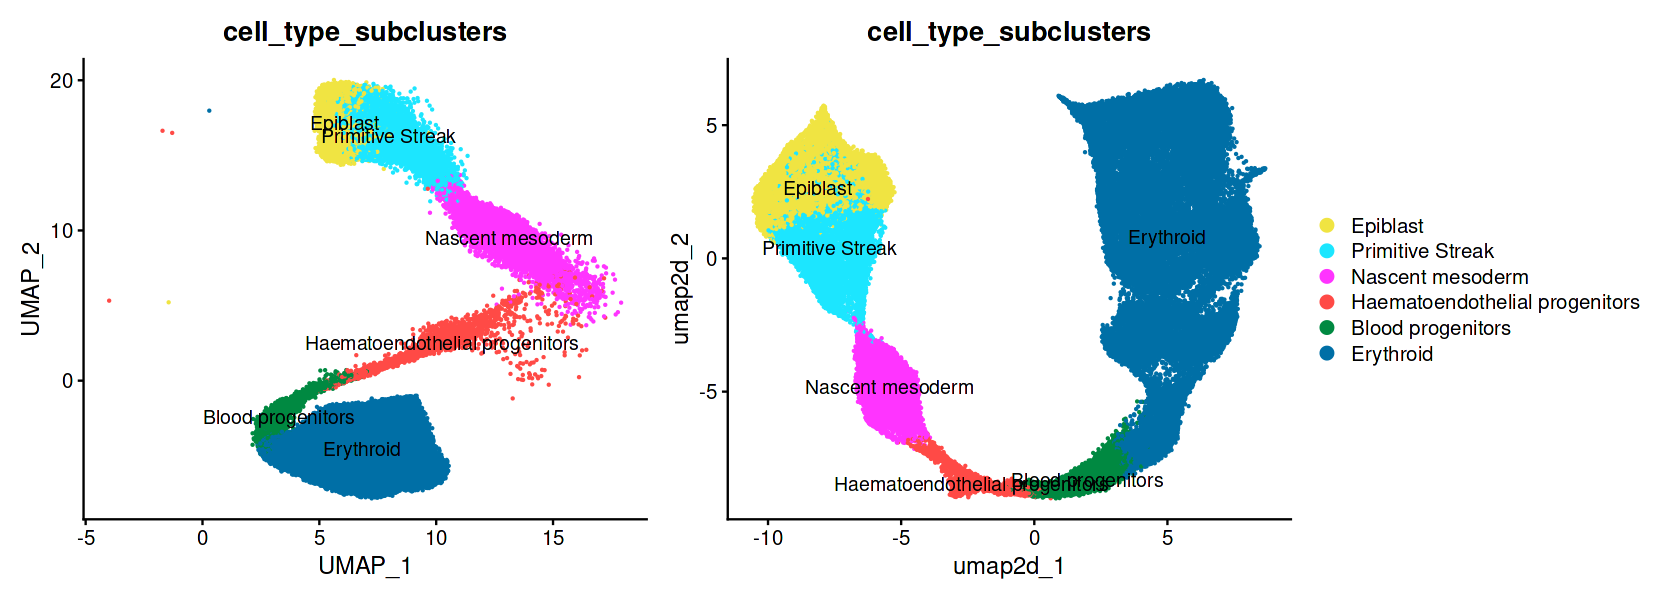

In [130]:
options(repr.plot.width = 14, repr.plot.height = 5)
DimPlot(atlas, reduction = 'UMAP', cols = r3dcol$cols_94, group.by = "cell_type_subclusters", label= TRUE, label.box = FALSE, raster = FALSE)+NoLegend()+
DimPlot(atlas, reduction = 'umap2d', cols = r3dcol$cols_94, group.by = "cell_type_subclusters", label= TRUE, label.box = FALSE, raster = FALSE)+NoLegend()

In [17]:
atlas$cell_type_subclusters <- factor(atlas$cell_type_subclusters, levels = keep)
levels(atlas$cell_type_subclusters)

[1] "Epiblast"                       "Primitive Streak"              
[3] "Nascent mesoderm"               "Haematoendothelial progenitors"
[5] "Blood progenitors"              "Erythroid"

In [20]:
# Define lineage ends
ENDS <- c("Erythroid")

In [22]:
set.seed(1)
lineages <- as.SlingshotDataSet(getLineages(
  data           = atlas@reductions$umap2d@cell.embeddings,
  clusterLabels  = atlas$cell_type_subclusters,
  dist.method    = "slingshot", # It can be: "simple", "scaled.full", "scaled.diag", "slingshot" or "mnn"
  end.clus       = ENDS, # You can also define the ENDS!
  start.clus     = "Epiblast"# define where to START the trajectories
)) 

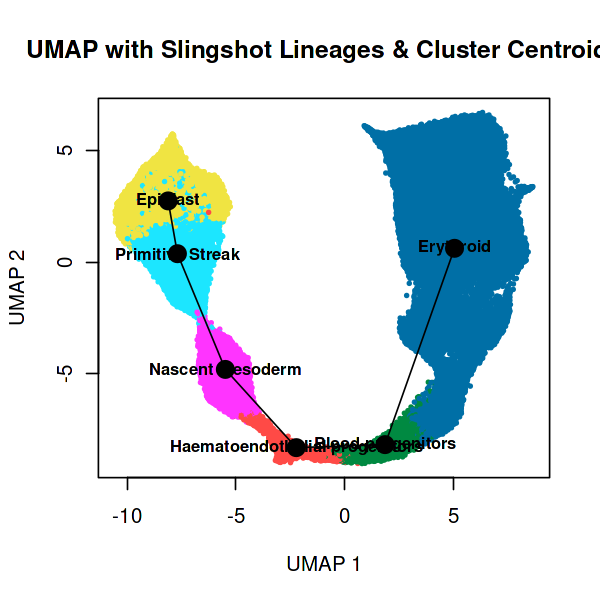

In [131]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot_umap_lineages_with_centroids(
  seurat_obj = atlas,
  reduction = "umap2d",
  cluster_col = "cell_type_subclusters",
  color_vector = r3dcol$cols_94,
  lineages = lineages,
  point_cex = 0.5,
  line_lwd = 1,
  label_cex = 0.8
)


In [26]:
# Define curves
curves <- as.SlingshotDataSet(getCurves(
  data          = lineages
))

curves

class: SlingshotDataSet 

 Samples Dimensions
   70218          2

lineages: 1 
Lineage1: Epiblast  Primitive Streak  Nascent mesoderm  Haematoendothelial progenitors  Blood progenitors  Erythroid  

curves: 1 
Curve1: Length: 34.769	Samples: 70218

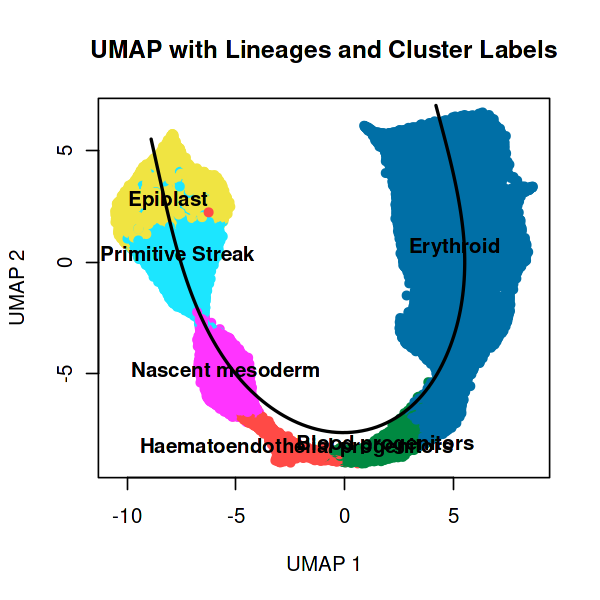

In [132]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot_umap_with_curves(  seurat_obj = atlas,
  reduction = "umap2d",
  cluster_col = "cell_type_subclusters",
  color_vector = r3dcol$cols_94,
  curves = curves,        # or 'curves' object from Slingshot
  label_cex = 1,
  point_pch = 16,
  point_cex = 1,
  line_lwd = 2
)

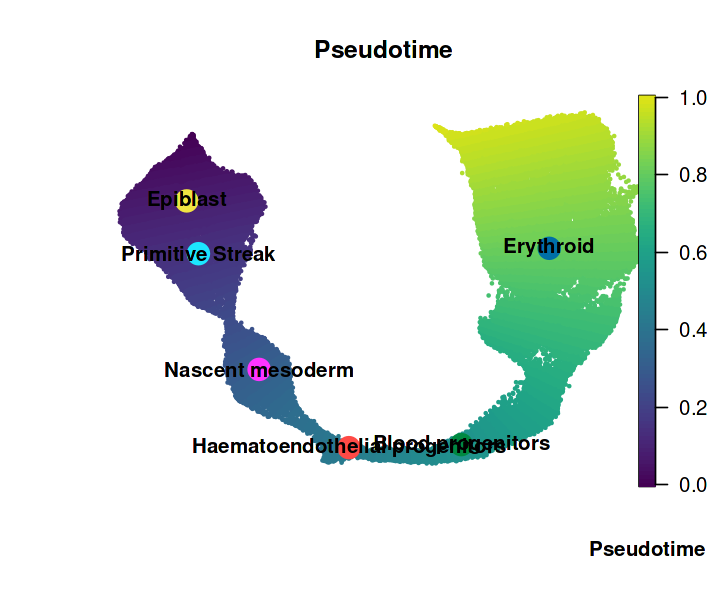

In [137]:
options(repr.plot.width = 6, repr.plot.height = 5)
plot_umap_pseudotime_and_centroids(
  seurat_obj = atlas,
  curves = curves,
  embedding = "umap2d",
  cluster_col = "cell_type_subclusters",
  color_vector = r3dcol$cols_94,   # Or your own color palette
  point_cex = 0.4,
  label_cex = 1,
  legend_title = "Pseudotime",
  legend_mar = 4
)


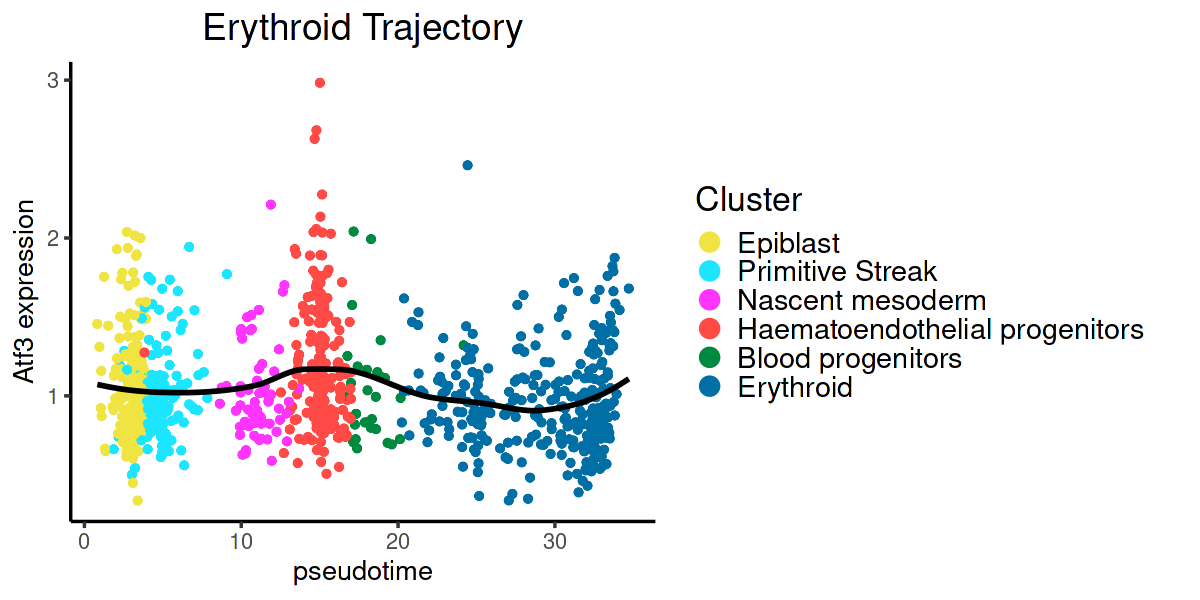

In [138]:
# Set plot size
options(repr.plot.width = 10, repr.plot.height = 5)


# Call function with custom colors
p <- plot_gene_specific_lineage_nozeros(
  atlas = atlas,
  gene = "Atf3",
  lineage = "Lineage1",
  curves = curves,
  lineages = lineages
)
p


In [140]:
saveRDS(atlas@reductions$umap2d, './erythorid/umap.rds')
saveRDS(lineages, './erythorid/lineages.rds')
saveRDS(curves, './erythorid/curves.rds')

# Primitive wave

In [194]:
keep <- c('Epiblast','Primitive Streak','Nascent mesoderm','Haematoendothelial progenitors',  "Embryo proper endothelium", "Allantois endothelium","Endocardium","Venous endothelium","YS endothelium", "EMP","MEP")

In [195]:
atlas <- subset(complete_atlas, subset = cell_type_subclusters %in% keep)
atlas

An object of class Seurat 
27669 features across 49310 samples within 1 assay 
Active assay: originalexp (27669 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: UMAP, PCA

In [196]:
atlas <- RunUMAP(atlas, dims = 1:75,reduction = "PCA",reduction.name = 'umap2d', verbose = FALSE)


In [200]:
atlas <- RunUMAP(atlas, dims = 1:75,reduction = "PCA",n.components = 3L,reduction.name = 'umap3d', verbose = FALSE)

In [ ]:
atlas$cell_type_subclusters <- factor(atlas$cell_type_subclusters, levels = keep)
levels(atlas$cell_type_subclusters)

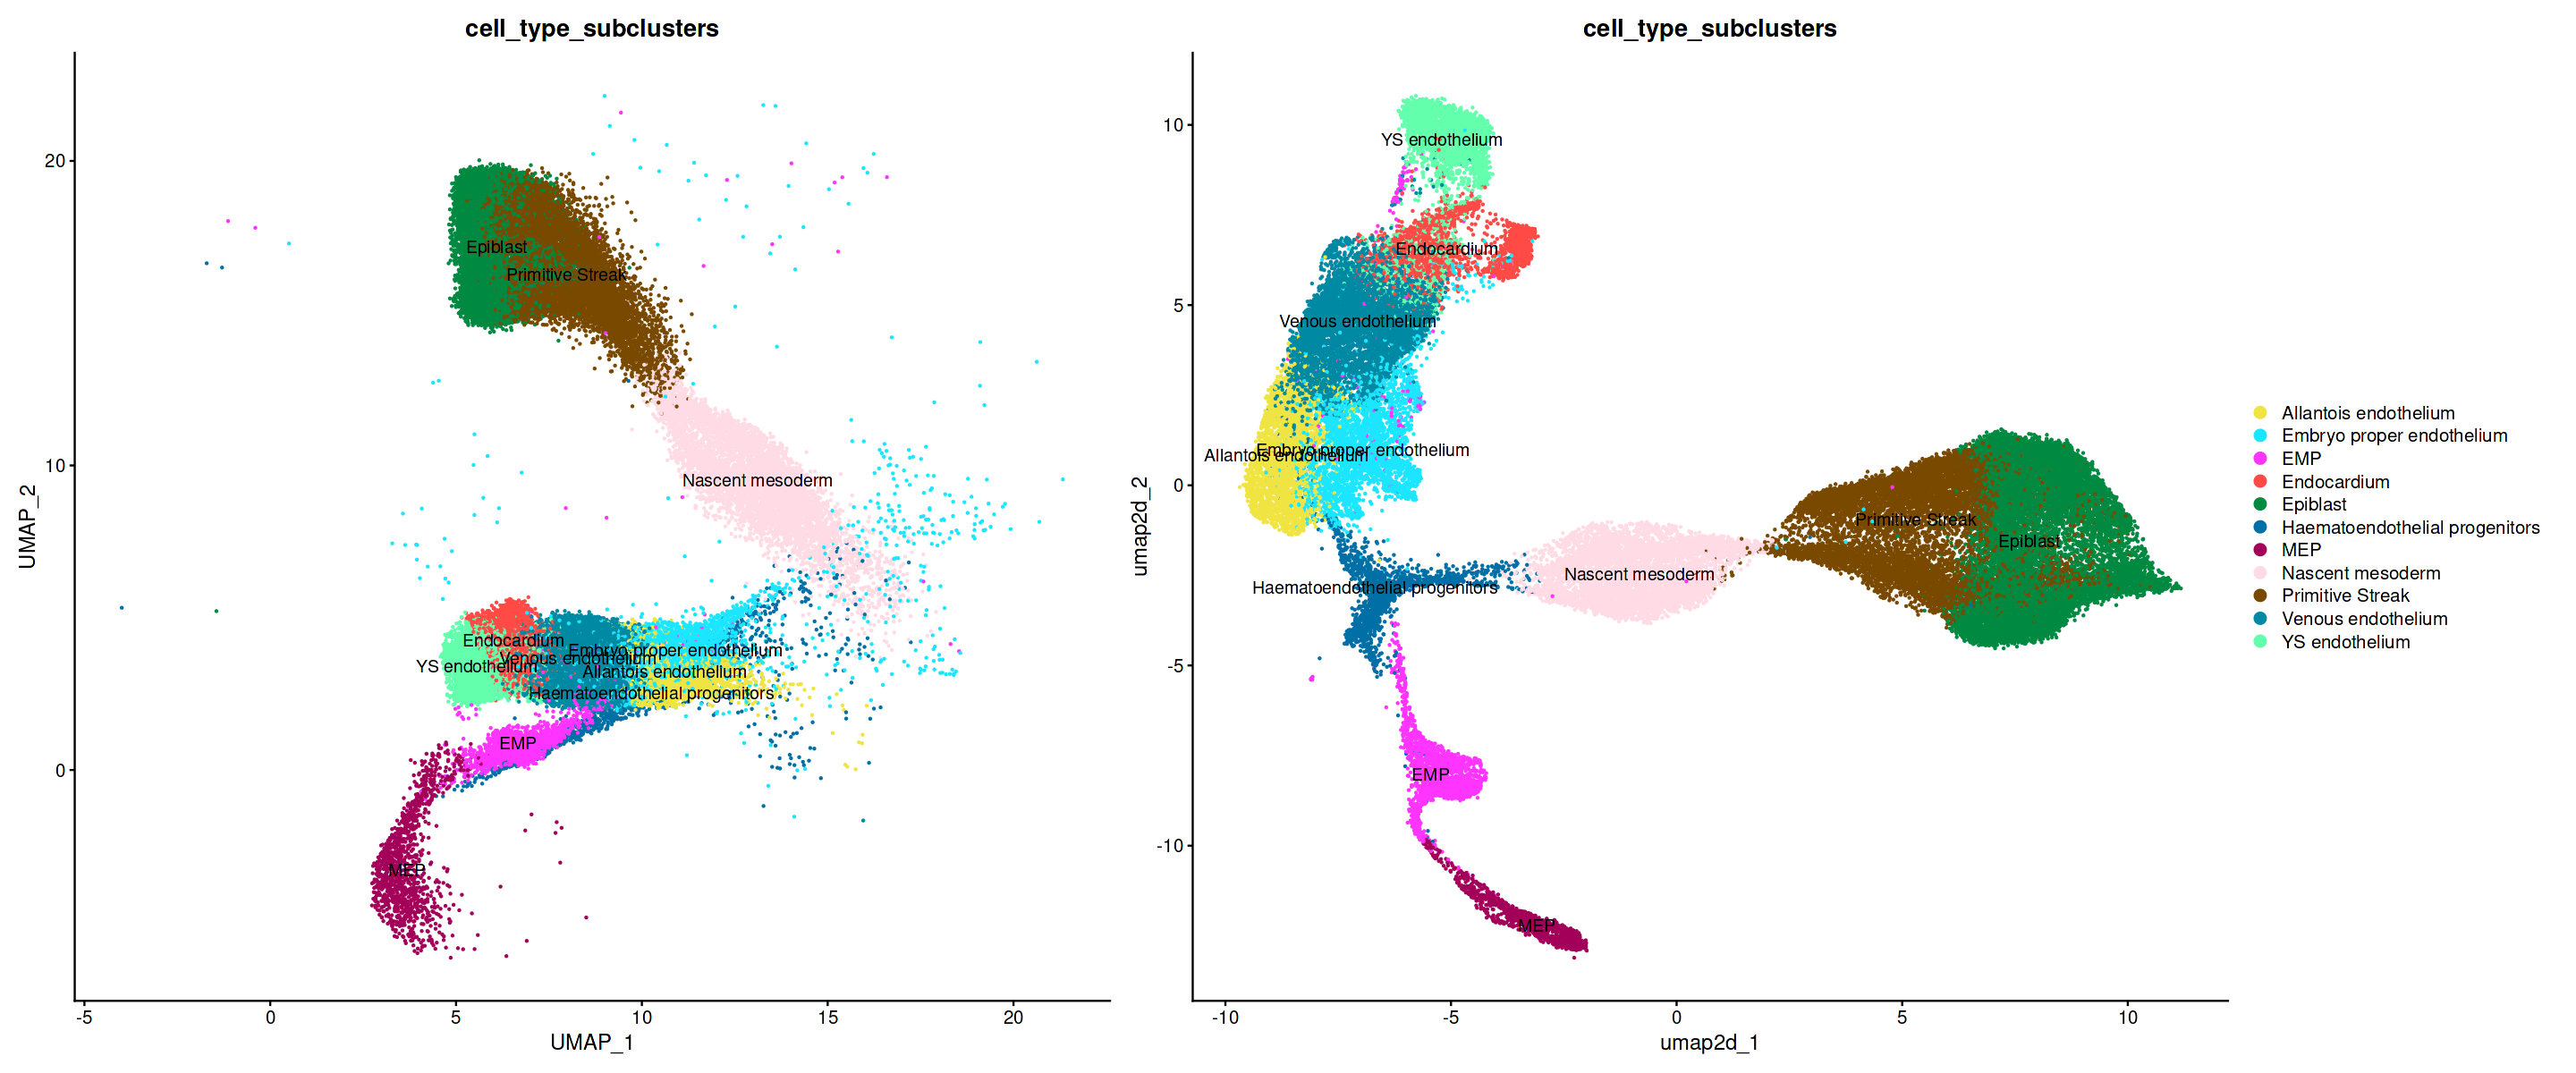

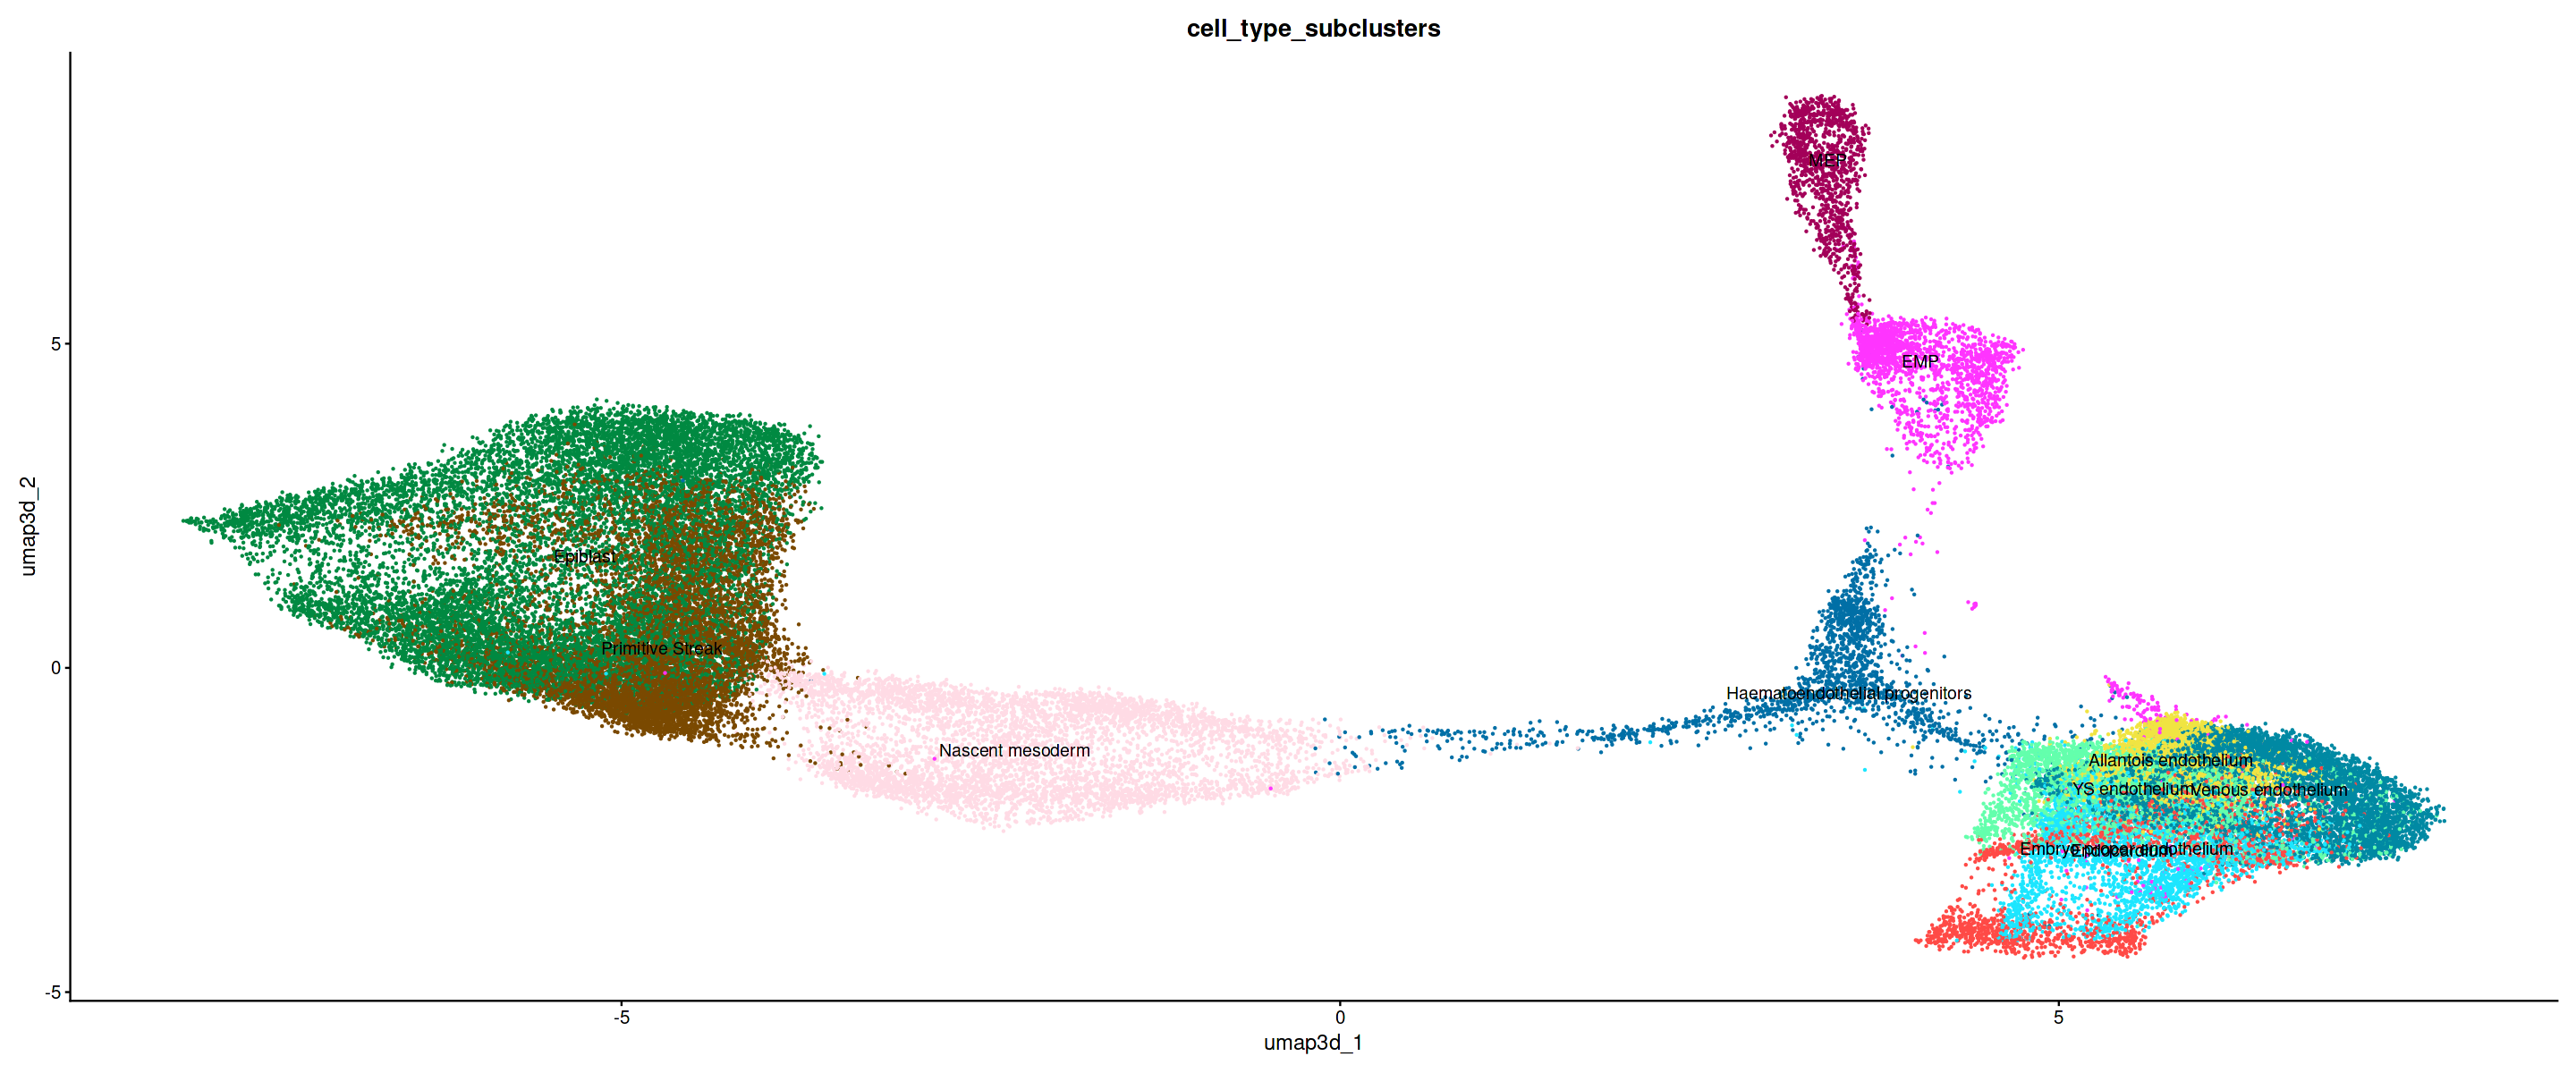

In [201]:
options(repr.plot.width = 24, repr.plot.height = 10)
DimPlot(atlas, reduction = 'UMAP', cols = r3dcol$cols_94, group.by = "cell_type_subclusters", label= TRUE, label.box = FALSE, raster = FALSE)+NoLegend()+
DimPlot(atlas, reduction = 'umap2d', cols = r3dcol$cols_94, group.by = "cell_type_subclusters", label= TRUE, label.box = FALSE, raster = FALSE)+NoLegend()
DimPlot(atlas, reduction = 'umap3d', cols = r3dcol$cols_94, group.by = "cell_type_subclusters", label= TRUE, label.box = FALSE, raster = FALSE)+NoLegend()

In [ ]:
# Define lineage ends
ENDS <- c("Erythroid")

In [202]:
set.seed(1)
lineages <- as.SlingshotDataSet(getLineages(
  data           = atlas@reductions$umap3d@cell.embeddings,
  clusterLabels  = atlas$cell_type_subclusters,
  dist.method    = "slingshot", # It can be: "simple", "scaled.full", "scaled.diag", "slingshot" or "mnn"
 # end.clus       = ENDS, # You can also define the ENDS!
  start.clus     = "Epiblast"# define where to START the trajectories
)) 

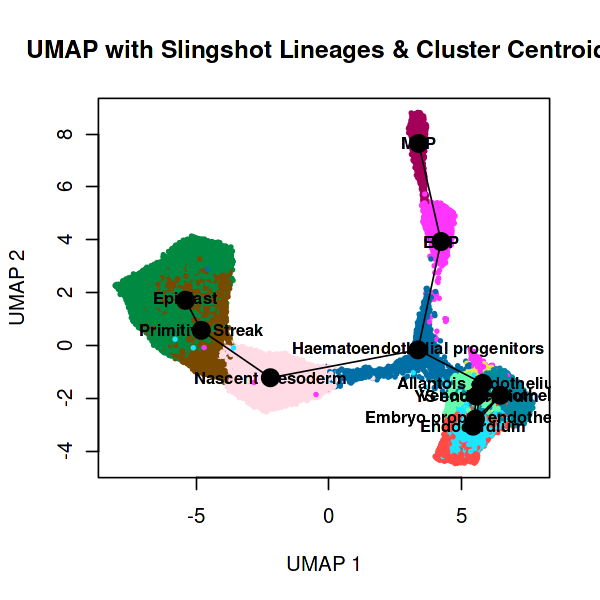

In [204]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot_umap_lineages_with_centroids(
  seurat_obj = atlas,
  reduction = "umap3d",
  cluster_col = "cell_type_subclusters",
  color_vector = r3dcol$cols_94,
  lineages = lineages,
  point_cex = 0.5,
  line_lwd = 1,
  label_cex = 0.8
)


In [ ]:
# Define curves
curves <- as.SlingshotDataSet(getCurves(
  data          = lineages
))

curves

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot_umap_with_curves(  seurat_obj = atlas,
  reduction = "umap2d",
  cluster_col = "cell_type_subclusters",
  color_vector = r3dcol$cols_94,
  curves = curves,        # or 'curves' object from Slingshot
  label_cex = 1,
  point_pch = 16,
  point_cex = 1,
  line_lwd = 2
)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
plot_umap_pseudotime_and_centroids(
  seurat_obj = atlas,
  curves = curves,
  embedding = "umap2d",
  cluster_col = "cell_type_subclusters",
  color_vector = r3dcol$cols_94,   # Or your own color palette
  point_cex = 0.4,
  label_cex = 1,
  legend_title = "Pseudotime",
  legend_mar = 4
)


In [ ]:
# Set plot size
options(repr.plot.width = 10, repr.plot.height = 5)


# Call function with custom colors
p <- plot_gene_specific_lineage_nozeros(
  atlas = atlas,
  gene = "Atf3",
  lineage = "Lineage1",
  curves = curves,
  lineages = lineages
)
p


In [ ]:
saveRDS(atlas@reductions$umap2d, './erythorid/umap.rds')
saveRDS(lineages, './erythorid/lineages.rds')
saveRDS(curves, './erythorid/curves.rds')